In [41]:
from google.colab import drive
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [44]:
# Mount Google Drive
drive.mount=('/content/drive/MyDrive/Images Dataset/unsplash-images-collection')

dataset_path = '/content/drive/MyDrive/Images Dataset/unsplash-images-collection'
image_size = (128, 128)

In [47]:
def load_images_from_folder(drivemount, image_size):
    images = []
    for filename in os.listdir(drivemount):
        img_path = os.path.join(drivemount, filename)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, image_size)
            img = img / 255.0  # Normalize
            images.append(img)
    return np.array(images)

In [50]:
# Load Dataset
print("Loading images...")
images = load_images_from_folder(dataset_path, image_size)
print(f"Loaded {len(images)} images.")

Loading images...
Loaded 802 images.


In [51]:
# Splitting Data
train_images = images[:int(0.8 * len(images))]
test_images = images[int(0.8 * len(images)) :]

In [53]:
# Building an Autoencoder for Image Enhancement
input_img = Input(shape=(image_size[0], image_size[1], 3))

In [54]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

In [55]:
# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [56]:
autoencoder = Model(input_img, x)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [57]:
# Train the model
autoencoder.fit(train_images, train_images, epochs=20, batch_size=16, validation_data=(test_images, test_images))

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - loss: 0.0652 - val_loss: 0.0165
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - loss: 0.0143 - val_loss: 0.0103
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 0.0103 - val_loss: 0.0095
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - loss: 0.0090 - val_loss: 0.0094
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - loss: 0.0083 - val_loss: 0.0074
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - loss: 0.0080 - val_loss: 0.0064
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - loss: 0.0069 - val_loss: 0.0061
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 0.0064 - val_loss: 0.0059
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - loss: 0.0063 - val_loss: 0.0063
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 0.0063 - val_loss: 0.0057
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - loss: 0.0056 - val_lo

In [58]:
# Save the trained model
model_path = '/content/drive/My Drive/image_enhancement_model.h5'
autoencoder.save(model_path)
print(f"Model saved at {model_path}")

Model saved at /content/drive/My Drive/image_enhancement_model.h5


In [59]:
# Display Original vs. Enhanced Images
def show_images(original, enhanced, num_images=5):
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i])
        plt.axis('off')
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(enhanced[i])
        plt.axis('off')
    plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 490ms/step


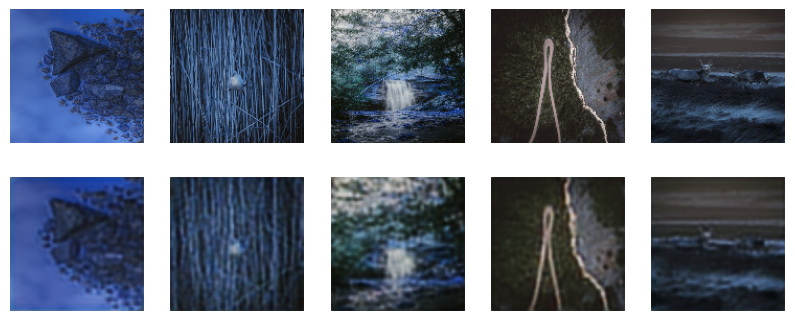

In [60]:
# Predict enhanced images
enhanced_images = autoencoder.predict(test_images)
show_images(test_images, enhanced_images)

In [63]:
model=autoencoder.save("image_enhancement_model.h5")